In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("../../"))
from pydistsim import NetworkGenerator
from pydistsim import *

In [2]:
from pydistsim.logger import enable_logger, set_log_level

enable_logger()
set_log_level("DEBUG")

In [3]:
net_gen = NetworkGenerator(10, 5, 15, degree=3)
net = net_gen.generate_random_network()

2024-05-29 01:59:48.927 | WARNING  | pydistsim.network.generator:__init__:72 - Generation could be slow for large degree parameter with bounded n_max.
2024-05-29 01:59:48.929 | INFO     | pydistsim.network.network:reset:377 - Resetting network.
2024-05-29 01:59:48.930 | INFO     | pydistsim.network.network:reset_all_nodes:465 - Resetting all nodes.
2024-05-29 01:59:48.931 | INFO     | pydistsim.network.network:__init__:73 - Instance of Network has been initialized.
2024-05-29 01:59:48.932 | DEBUG    | pydistsim.network.environment:find_random_pos:212 - Random position found in 0 iterations.
2024-05-29 01:59:48.933 | DEBUG    | pydistsim.network.network:add_node:251 - Node 1 is placed on position [452.2052451   48.50440572].
2024-05-29 01:59:48.934 | DEBUG    | pydistsim.network.environment:find_random_pos:212 - Random position found in 0 iterations.
2024-05-29 01:59:48.935 | DEBUG    | pydistsim.network.network:add_node:251 - Node 2 is placed on position [474.01309408 439.20193774].
20

/home/agus/.pymote_venv/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/mnt/d/Proyectos/pymote/pydistsim/network/network.py:383: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


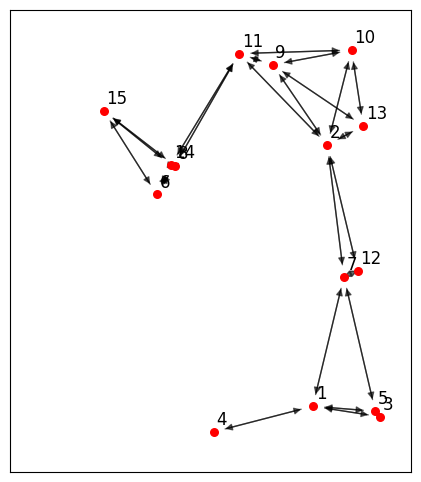

In [4]:
net.show()

In [5]:
from pydistsim.algorithms.broadcast import Flood

# Asigna el algoritmo
net.algorithms = ((Flood, {"informationKey": "I"}),)

# Asigna el mensaje a enviar, la información inicial
some_node = net.nodes_sorted()[0]
some_node.memory["I"] = "Hello distributed world"

2024-05-29 01:59:49.638 | INFO     | pydistsim.network.network:reset:377 - Resetting network.
2024-05-29 01:59:49.639 | INFO     | pydistsim.network.network:reset_all_nodes:465 - Resetting all nodes.
2024-05-29 01:59:49.640 | DEBUG    | pydistsim.algorithm:__init__:132 - Instance of Flood class has been initialized.


In [6]:
from pydistsim.npickle import write_npickle, read_npickle

# Escribir la red + algoritmo en un archivo
write_npickle(net, "mreza1.tar.gz")
net_from_file = read_npickle("mreza1.tar.gz")
net_from_file

2024-05-29 01:59:49.657 | INFO     | pydistsim.npickle:write_pickle:54 - instance of <class 'pydistsim.network.rangenetwork.RangeNetwork'> saved in mreza1.tar.gz
2024-05-29 01:59:49.666 | INFO     | pydistsim.npickle:read_pickle:75 - instance of <class 'pydistsim.network.rangenetwork.RangeNetwork'> loaded: mreza1.tar.gz


In [7]:
# Correr la simulación
%run -m pydistsim.gui

In [8]:
from pydistsim.metrics import MetricCollector

metrics = MetricCollector()

In [9]:
sim = Simulation(net)
sim.add_observers(metrics)

2024-05-29 01:59:58.001 | DEBUG    | pydistsim.simulation:__init__:42 - Simulation 0x7fd6e81e97c0 created successfully.


In [10]:
sim.run(0)

2024-05-29 01:59:58.020 | DEBUG    | pydistsim.algorithm:step:192 - [Flood] Step 1 started
2024-05-29 01:59:58.023 | DEBUG    | pydistsim.network.node:push_to_inbox:136 - Message delivered to <Node id=1>
2024-05-29 01:59:58.023 | DEBUG    | pydistsim.algorithm:step:208 - [Flood] Step 1 finished
2024-05-29 01:59:58.024 | DEBUG    | pydistsim.algorithm:step:192 - [Flood] Step 2 started
2024-05-29 01:59:58.025 | DEBUG    | pydistsim.network.network:communicate:538 - Communicating messages in the network.
2024-05-29 01:59:58.027 | DEBUG    | pydistsim.network.network:get_some_message:474 - There are no nodes with messages in outbox.
2024-05-29 01:59:58.027 | DEBUG    | pydistsim.algorithm:step:208 - [Flood] Step 2 finished
2024-05-29 01:59:58.028 | DEBUG    | pydistsim.algorithm:step:192 - [Flood] Step 3 started
2024-05-29 01:59:58.029 | DEBUG    | pydistsim.network.network:communicate:538 - Communicating messages in the network.
2024-05-29 01:59:58.030 | DEBUG    | pydistsim.network.netwo

In [11]:
metrics.make_report()

{'messages_sent': 38, 'messages_delivered': 39, 'qty_nodes_status_changed': 31}